# Imports

note: use pip install vaderSentiment

In [1]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from vader_model import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/MilesChild/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/MilesChild/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Example of VADER sentiment analysis tool:

# Positive string:
print(sid.polarity_scores('I love this movie!'))

# Negative string:
print(sid.polarity_scores('I hate this movie!'))

{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}
{'neg': 0.666, 'neu': 0.334, 'pos': 0.0, 'compound': -0.6114}


# Creating a sentiment score dataframe using our text reviews data:

In [3]:
# initialize the reviews dataframe
text_df = pd.read_csv('../data_initialEDA.csv')

In [4]:
# Step 2: Use VADER model to score each of the reviews and store the output in a new column.
# note: this takes a while to run
vm = VaderModel()

sentiment_df = vm.add_scores_to_dataframe(text_df, 'Review')
sentiment_df.head()

,Stars,Review,scores,neg,neu,pos,compound
0,1,I got 'new' tires from them and within two wee...,"{'neg': 0.067, 'neu': 0.933, 'pos': 0.0, 'comp...",0.067,0.933,0.000,-0.8951
1,1,Don't waste your time. We had two different p...,"{'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'comp...",0.000,0.939,0.061,0.3252
2,1,All I can say is the worst! We were the only 2...,"{'neg': 0.092, 'neu': 0.853, 'pos': 0.055, 'co...",0.092,0.853,0.055,-0.7697
3,1,I have been to this restaurant twice and was d...,"{'neg': 0.137, 'neu': 0.833, 'pos': 0.031, 'co...",0.137,0.833,0.031,-0.9645
4,1,Food was NOT GOOD at all! My husband & I ate h...,"{'neg': 0.13, 'neu': 0.825, 'pos': 0.044, 'com...",0.130,0.825,0.044,-0.9392


In [5]:
sentiment_df.iloc[:, 3:]

,neg,neu,pos,compound
0,0.067,0.933,0.000,-0.8951
1,0.000,0.939,0.061,0.3252
2,0.092,0.853,0.055,-0.7697
3,0.137,0.833,0.031,-0.9645
4,0.130,0.825,0.044,-0.9392
...,...,...,...,...
49875,0.083,0.789,0.127,0.7933
49876,0.000,0.229,0.771,0.9571
49877,0.000,0.807,0.193,0.9629
49878,0.053,0.743,0.204,0.9786


In [6]:
# initialize features
X   = sentiment_df.iloc[:, 3:].values
y   = sentiment_df['Stars'].values     

# reshape y array
y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7 #reproduce the result
                                                   )

NameError: name 'train_test_split' is not defined

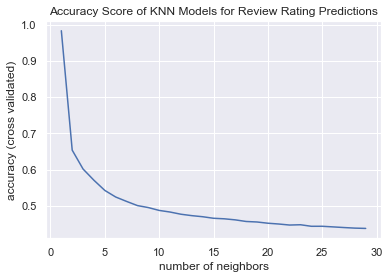

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# list n_neighbors to test
n_neighbors = list(range(1, 30))
a_scores = []


for neighbors in n_neighbors: 
    # initialize a knn_classifier
    knn_classifier = KNeighborsClassifier(n_neighbors =  neighbors)

    # construction of kfold object
    kfold = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 1)

    # allocate an empty array to store predictions in 
    y_pred = np.empty_like(y)

    for train_idx, test_idx in kfold.split(X, y):
        # build arrays which correspond to x, y train /test
        x_test = X[test_idx, :]
        x_train = X[train_idx, :]
        y_true_train = y[train_idx]



        # fit the classifier (use all available data)
        knn_classifier.fit(X, y)

        # estimate each review's star
        y_pred[test_idx] = knn_classifier.predict(x_test)

    
    # compute accuracy
    a_scores.append(accuracy_score(y_true = y, y_pred = y_pred))

sns.set()
plt.plot(n_neighbors, a_scores)
plt.xlabel('number of neighbors')
plt.ylabel('accuracy (cross validated)')
plt.title('Accuracy Score of KNN Models for Review Rating Predictions')
plt.show()
    


In [8]:
print(f'Maximum score achieved by KNN model: {max(a_scores)}')

Maximum score achieved by KNN model: 0.9829390537289495
